## Word Vectors

In [5]:
import requests
import json

In [6]:
GUTENBERG_URL ='https://www.gutenberg.org/files/{}/{}-0.txt'

In [7]:
catalog = [
    { 'title': 'Pride and Prejudice', 'author': 'Jane Austen', 'id': 1342},
    { 'title': 'A Christmas Carol in Prose', 'author': 'Charles Dickens', 'id': 46},
    { 'title': 'A Tale of Two Cities', 'author': 'Charles Dickens', 'id': 98}, 
    { 'title': 'Frankenstein; Or, The Modern Prometheus', 'author': 'Mary Wollstonecraft Shelley','id': 84},
    { 'title': 'Dracula', 'author': 'Bram Stoker', 'id':345},
    { 'title': 'Heart of Darkness', 'author': 'Joseph Conrad', 'id':219},
    { 'title': 'Moby Dick; Or, The Whale', 'author': 'Herman Melville', 'id': 2701},
    { 'title': "Alice's Adventures in Wonderland", 'author': 'Lewis Carroll','id':11 },
    { 'title': 'The Adventures of Sherlock Holmes', 'author': 'Arthur Conan Doyle', 'id':1661 },
    { 'title':  'A Modest Proposal', 'author': 'Jonathan Swift', 'id': 1080}
]

In [50]:
with open('ProjectGutenbergBooks.json', 'r') as catalog_file:
    catalog = json.load(catalog_file)

In [55]:
catalog

[{'title': 'Pride and Prejudice', 'author': 'Jane Austen', 'id': 1342},
 {'title': 'A Christmas Carol in Prose',
  'author': 'Charles Dickens',
  'id': 46},
 {'title': 'A Tale of Two Cities', 'author': 'Charles Dickens', 'id': 98},
 {'title': 'Frankenstein; Or, The Modern Prometheus',
  'author': 'Mary Wollstonecraft Shelley',
  'id': 84},
 {'title': 'Dracula', 'author': 'Bram Stoker', 'id': 345},
 {'title': 'Heart of Darkness', 'author': 'Joseph Conrad', 'id': 219},
 {'title': 'Moby Dick; Or, The Whale',
  'author': 'Herman Melville',
  'id': 2701},
 {'title': "Alice's Adventures in Wonderland",
  'author': 'Lewis Carroll',
  'id': 11},
 {'title': 'The Adventures of Sherlock Holmes',
  'author': 'Arthur Conan Doyle',
  'id': 1661},
 {'title': 'A Modest Proposal', 'author': 'Jonathan Swift', 'id': 1080}]

In [46]:
import re

GUTENBERG_URL ='https://www.gutenberg.org/files/{}/{}-0.txt'

def load_book(book_id):
    url = GUTENBERG_URL.format(book_id, book_id)
    contents = requests.get(url).text
    cleaned_contents = re.sub(r'\r\n', ' ', contents)
    return cleaned_contents

In [48]:
book_ids = [ book['id'] for book in catalog ]
books = [ load_book(id) for id in book_ids]

In [47]:
from gensim.summarization import textcleaner
from gensim.utils import simple_preprocess

def to_sentences(book):
    sentences = textcleaner.split_sentences(book)
    sentence_tokens = [simple_preprocess(sentence) for sentence in sentences]
    return sentence_tokens
    

In [41]:
books_sentences = [to_sentences(book) for book in books]
documents = [ sentence for book_sent in books_sentences for sentence in book_sent ]

In [51]:
len(documents)

79680

In [52]:
from gensim.models import Word2Vec
# build vocabulary and train model
model = Word2Vec(
        documents,
        size=100,
        window=10,
        min_count=2,
        workers=10)
model.train(documents, total_examples=len(documents), epochs=50)

(94966188, 128229400)

In [55]:
model.wv.most_similar(positive='worse')

[('better', 0.523128867149353),
 ('merrier', 0.4560740888118744),
 ('happier', 0.4309377074241638),
 ('slower', 0.4200277328491211),
 ('acquittal', 0.4128979444503784),
 ('bitterer', 0.37084224820137024),
 ('safety', 0.36938896775245667),
 ('mahogany', 0.3685840964317322),
 ('more', 0.363077312707901),
 ('caring', 0.3617636263370514)]

In [83]:
import gc
gc.collect()

0

In [28]:
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

In [59]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

def show_vector(word):
    vector = model.wv[word]
    fig, ax = plt.subplots(1,1, figsize=(10, 2))
    ax.tick_params(axis='both', 
                   which='both',
                   left=False, 
                   bottom=False, 
                   top=False,
                   labelleft=False, 
                   labelbottom=False)
    ax.grid(False)
    print(word)
    ax.bar(range(len(vector)), vector, 0.5)


sad


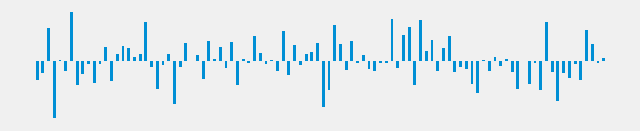

In [60]:
show_image('sad')

happy


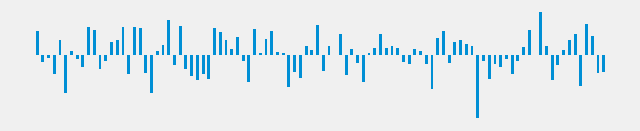

In [61]:
show_image('happy')

In [43]:
import json
with open('ProjectGutenbergBooks.json', 'w') as outfile:
    json.dump(catalog, outfile)